
## SVD Application for Occluded Face Recognition
## Author: Amanda Yu, Mehnaz Siddiquee
## Objective
Explore Singular Value Decomposition (SVD) and Principal Component Analysis (PCA) for:
- Image reconstruction.
- Training and testing classification models.
- Evaluate PCA as an optimal solution over SVD.

This notebook explores the use of Singular Value Decomposition (SVD) and Principal Component Analysis (PCA) for reconstructing and recognizing facial images, with a focus on occluded faces (masks). The project demonstrates reconstruction quality and classification results.


## Introduction and Preprocessing
We used masked and neutral data from [Real World Occluded Faces dataset](https://github.com/ekremerakin/RealWorldOccludedFaces)

The total images we used in masked was 498 and images in neutral 978

Preproccessing
1. Images resized to 64×64 pixels.
2. Converted to grayscale and flattened for matrix computations.


## SVD

The SVD algorithm is applied to decompose image data into singular values and vectors. This technique helps analyze the structure of the data but can be computationally expensive for high-dimensional datasets.


SVD on image matrix: $A = U \Sigma V^t$
- $U$: orthogonal matrix of left singular vectors of $A$.
- $\Sigma$: diagonal matrix and are singular values of $A$
- $V^t$: transposed orthogonal matrix of. $V$ right singular vectors of $A$.


To reduce top # of to $k$ values: $\text{Reconstructed Image} = U_k \Sigma_kV_k^t$
- $U_k$: The first $k$ columns of $U$
- $\Sigma_k$: diagonal matrix of the top $k$ singular values
- $V_k^t$: The first $k$ rows of $V^t$

## SVD reconstructed images

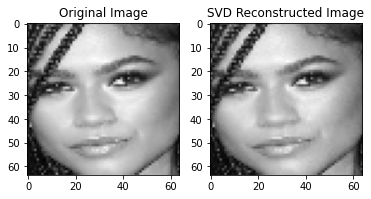
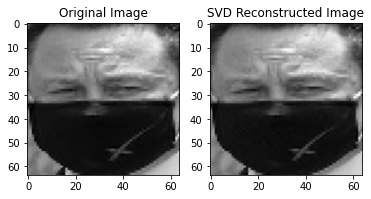

At 40 principal components SVD creates an almost perfect representation of the original image. Facial recognition tasks involves processing high dimensional image data. SVD alone does not select dimensions to reduce the data. PCA reduces the dimensionality while retaining the most significant information.


### PCA

### How PCA can be derived from SVD

**SVD: $ A = U \Sigma V^t$**

$U$ and $V^T$ are orthogonal and $\Sigma$ is  diagonal

$\Sigma$ has the singular values on the diagonal $\{ \sigma_1, \sigma_2, \dots, \sigma_m \}$

Covariance matrix: $A = AA^T$

$$
A = U \cdot \Sigma \cdot V^T \cdot V \cdot \Sigma^T \cdot U^T
$$

$$
 = U \Lambda U^T
$$


- $ \Lambda_{N \times N} $ is the eigenvalues and a diagonal matrix with $\{ \lambda_1, \lambda_2, \dots, \lambda_n \}$
    - $\lambda_i = \sigma_i^2$

- $ U_{N \times N} $ is constructed of all the eigenvectors $\{ e_1, e_2, \dots, e_K, \dots, e_N \}$


**For PCA we'll have a data matrix $$A_{M \times N} = \{ a_1, a_2, \dots, a_m \}$$**

then we can compute a compute a covariance matrix: $A = AA^T$

Solve Eigenvalue Problem: $Ax = \lambda x$
- this will give us all the eigenvalues and eigenvectors of the covariance matrix

eigenvalues $\{ \lambda_1, \lambda_2, \dots, \lambda_K \}$

eigenvectors $\{ e_1, e_2, \dots, e_K \}$
- The first K principal components correspond to the top  K eigenvectors of the covariance matrix and they span the K-dimensional principal subspace of the data

For simplicity we can compute PCA by performing the reduced SVD then taking $U \Sigma$  or $AV^t$



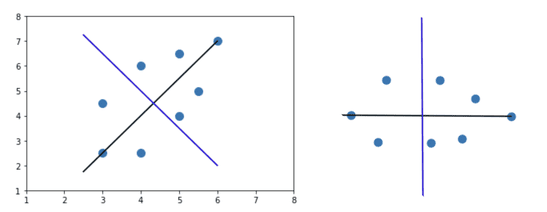

PCA is a linear transformation of data
- projects onto $\mathscr{C}(A)$

Eigenvectors from a symmetric matrix lie in directions where the data has the most variation. With covariance matrices, eigenvectors correspond to different eigenvalues that are orthogonal

the covariance matrix describes the relationships between different features in a dataset

The eigenvectors of the covariance matrix will give us the direction of the new axis  

In PCA this represents the directions of maximum variance in the data



##Eigenfaces
### Eigenfaces ane mean face for the neutral images

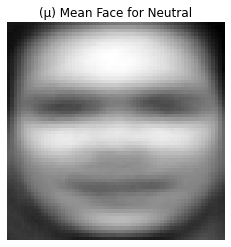<br>
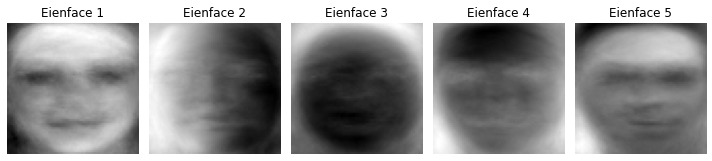

### Eigenfaces and mean for the masked images

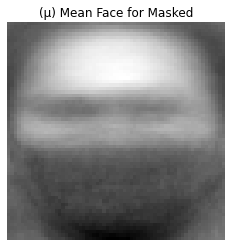 <br>
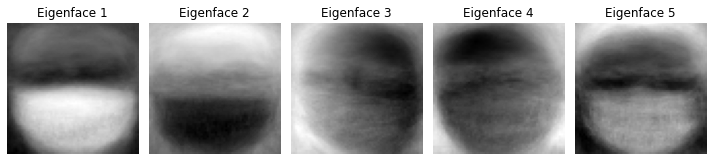

The full set of PCA features $p_i$ form an **orthogonal basis** for $\mathscr{C}(A)$
- here is just 5 eigenfaces out of a number

Each eigenface is encoded by the coordinate vector $V^t_i$
If we take a subset of the principal components, such as the top 100, and use their linear combination weighted by the appropriate coefficients, we can reconstruct an approximation of a face image from its corresponding row in $V^t_i$

### Comparing SVD reconstruction with PCA reconstruction at 40 k values (principal components)

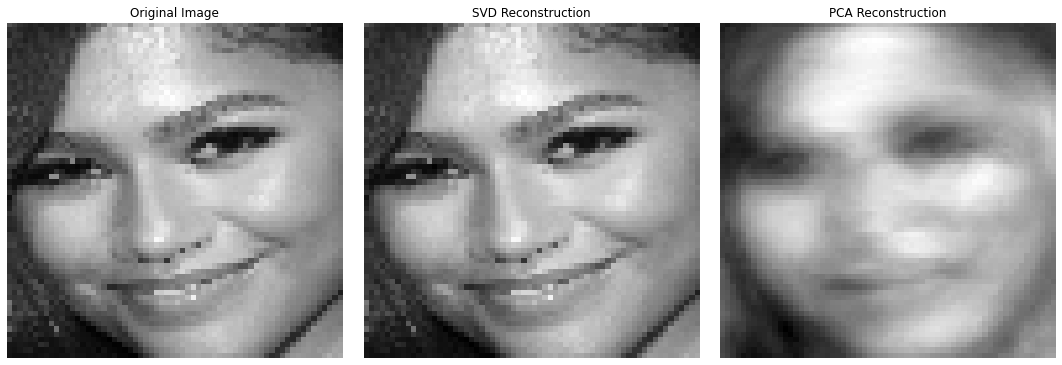

Again SVD provides a superior reconstruction to PCA, however this is because PCA select dimensions to reduce the data.

## Dimensionality Reduction

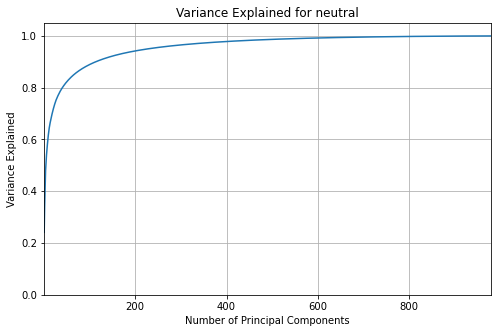
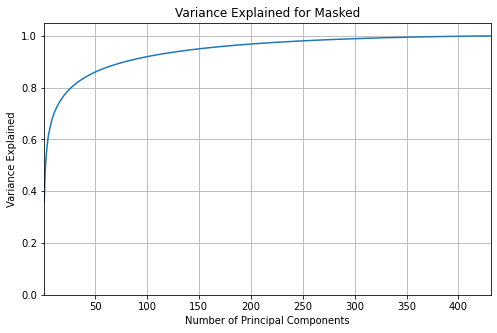

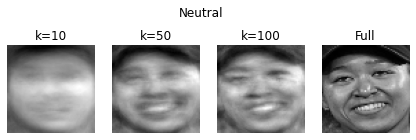 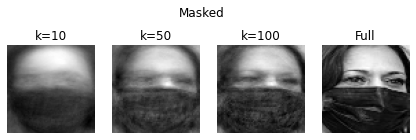

The PCA features are ordered by their importance (variance explained).

Variance explained = cumulative sum of the eigenvalues divided by the total
- X axis tells you the number of PCs
- Y axis tells you how much fraction of the variance we would capture

At 10 PCs the image is pretty generic and It's not a typically good representation of the face

When we get to around 100 we have a good approximation of the face since it captures about 90% of the variance


## Training and Testing

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78        80
           1       0.88      0.93      0.90       166

    accuracy                           0.87       246
   macro avg       0.86      0.83      0.84       246
weighted avg       0.86      0.87      0.86       246


Confusion Matrix:<br>
 [[ 58  22] <br>
 [ 11 155]]<br>
['masked' 'neutral']

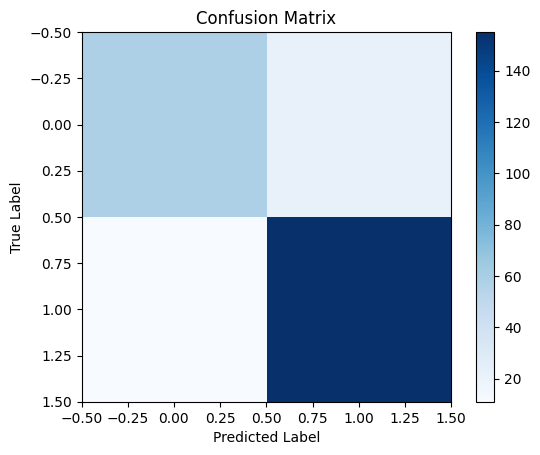

#### correct predictions

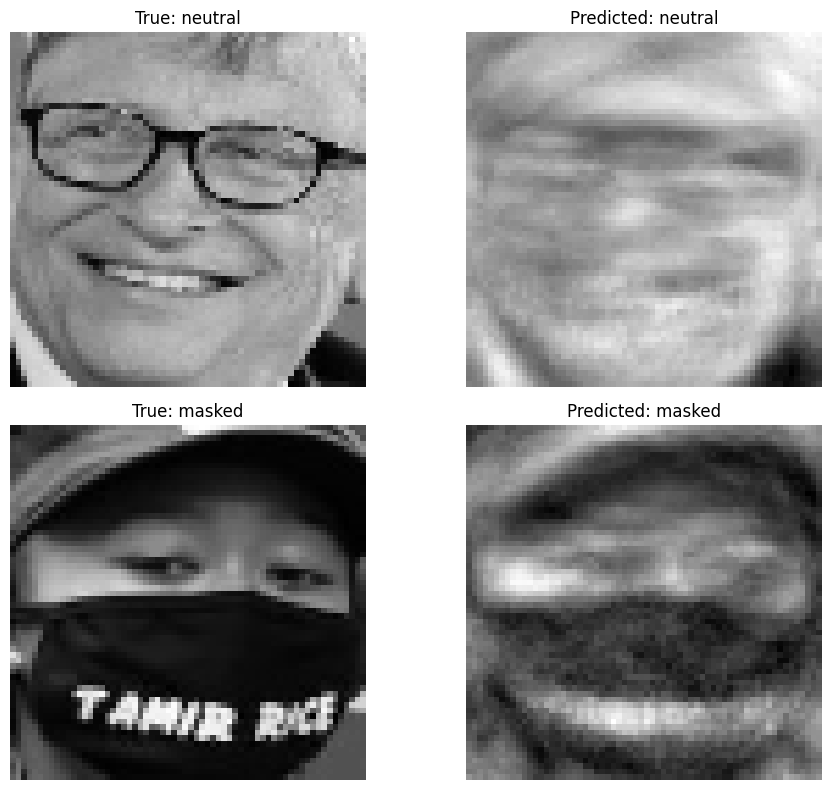

#### Incorrect Predictions

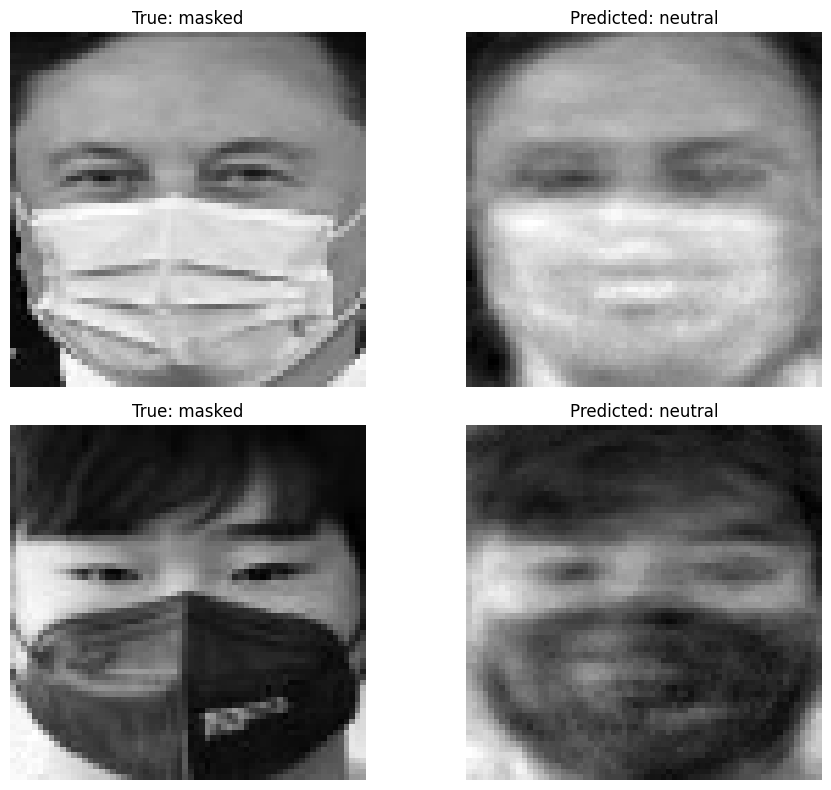

## Results

Conclusion:
- SVD reconstruction for occluded faces can be done well.
- PCA offers better performance for training and testing due to efficient dimensionality reduction.